In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [9]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [10]:
df.duplicated().sum()

np.int64(3)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


/tmp/ipython-input-13-3971619134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='Set2')


<Axes: xlabel='species', ylabel='count'>

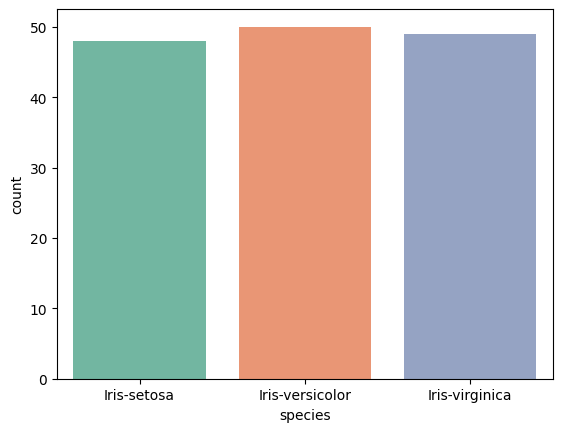

In [13]:
sns.countplot(x='species', data=df, palette='Set2')

/tmp/ipython-input-14-1849611601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="species", y="sepal_length", data=df, palette=colors)


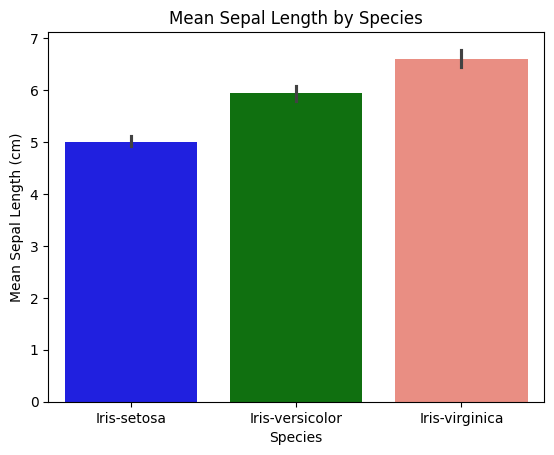

In [14]:
df.groupby(["species"], as_index=False)["sepal_length"].mean()
colors = ["blue", "green", "salmon"]
sns.barplot(x="species", y="sepal_length", data=df, palette=colors)
plt.xlabel("Species")
plt.ylabel("Mean Sepal Length (cm)")
plt.title("Mean Sepal Length by Species")
plt.show()

/tmp/ipython-input-15-2772621985.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="sepal_length", palette=colors)


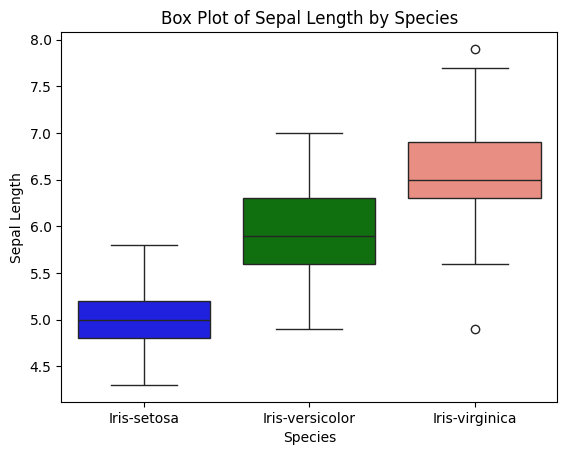

In [15]:
sns.boxplot(data=df, x="species", y="sepal_length", palette=colors)
plt.title("Box Plot of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()


In [16]:
df.groupby(["species"], as_index=False)["sepal_width"].mean()

,species,sepal_width
0,Iris-setosa,3.431250
1,Iris-versicolor,2.770000
2,Iris-virginica,2.979592


/tmp/ipython-input-17-1899142975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="species", y="sepal_width", data=df, palette=colors)


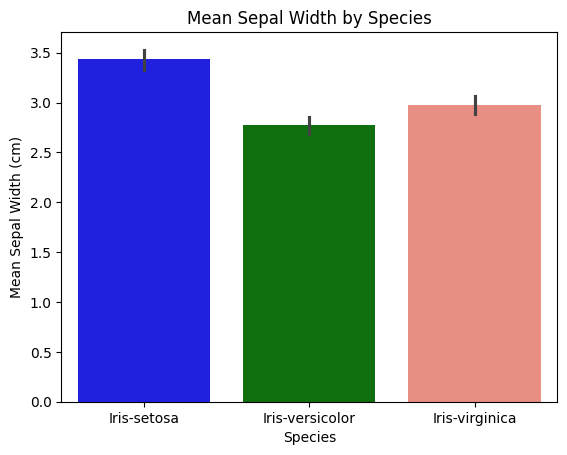

In [17]:
sns.barplot(x="species", y="sepal_width", data=df, palette=colors)
plt.xlabel("Species")
plt.ylabel("Mean Sepal Width (cm)")
plt.title("Mean Sepal Width by Species")
plt.show()


/tmp/ipython-input-18-2575115221.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="sepal_width", palette=colors)


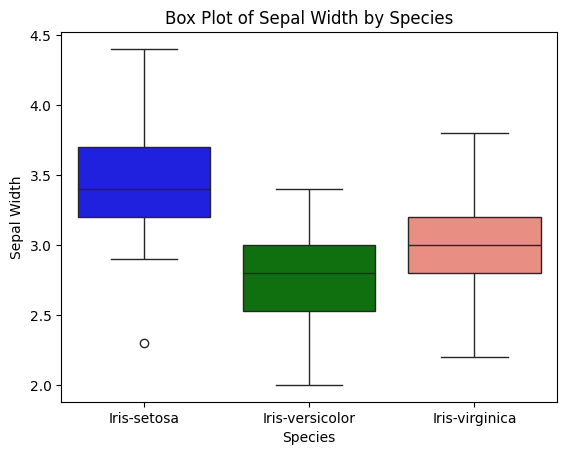

In [18]:
sns.boxplot(data=df, x="species", y="sepal_width", palette=colors)
plt.title("Box Plot of Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.show()

In [19]:
df.groupby(["species"], as_index=False)["petal_length"].mean()

,species,petal_length
0,Iris-setosa,1.462500
1,Iris-versicolor,4.260000
2,Iris-virginica,5.561224


/tmp/ipython-input-20-2097715635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="species", y="petal_length", data=df, palette=colors)


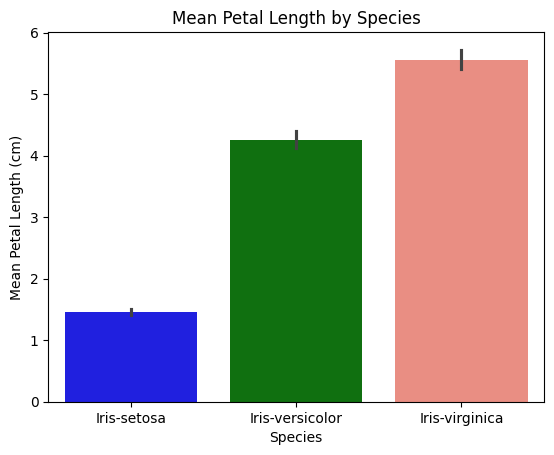

In [20]:
sns.barplot(x="species", y="petal_length", data=df, palette=colors)
plt.xlabel("Species")
plt.ylabel("Mean Petal Length (cm)")
plt.title("Mean Petal Length by Species")
plt.show()

/tmp/ipython-input-21-486192588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="petal_length", palette=colors)


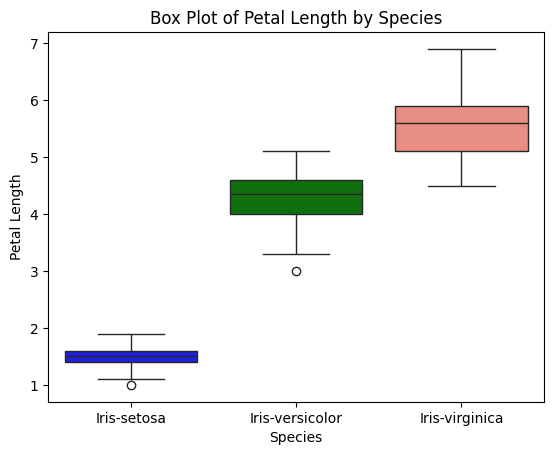

In [21]:
sns.boxplot(data=df, x="species", y="petal_length", palette=colors)
plt.title("Box Plot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.show()

In [22]:
df.groupby(["species"], as_index=False)["petal_width"].mean()

,species,petal_width
0,Iris-setosa,0.250000
1,Iris-versicolor,1.326000
2,Iris-virginica,2.028571


/tmp/ipython-input-23-2752174494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='petal_width', data=df, palette=colors)


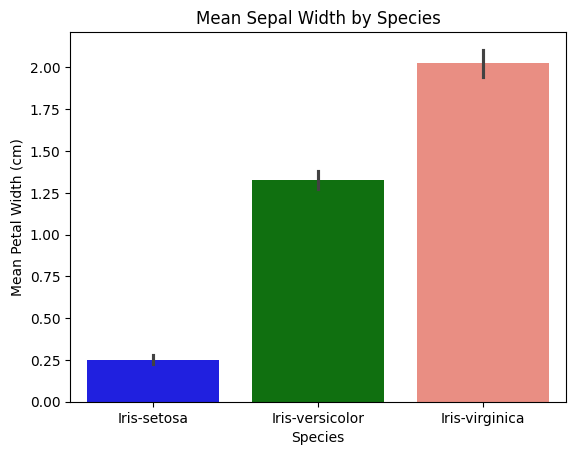

In [23]:
sns.barplot(x='species', y='petal_width', data=df, palette=colors)
plt.xlabel("Species")
plt.ylabel("Mean Petal Width (cm)")
plt.title("Mean Sepal Width by Species")
plt.show()


/tmp/ipython-input-24-3161480135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="petal_width", palette=colors)


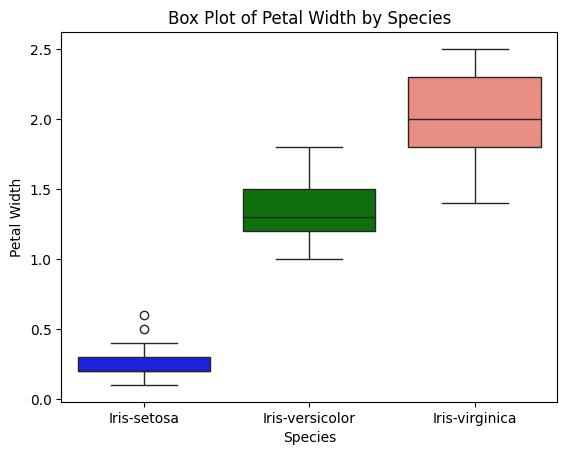

In [24]:
sns.boxplot(data=df, x="species", y="petal_width", palette=colors)
plt.title("Box Plot of Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.show()

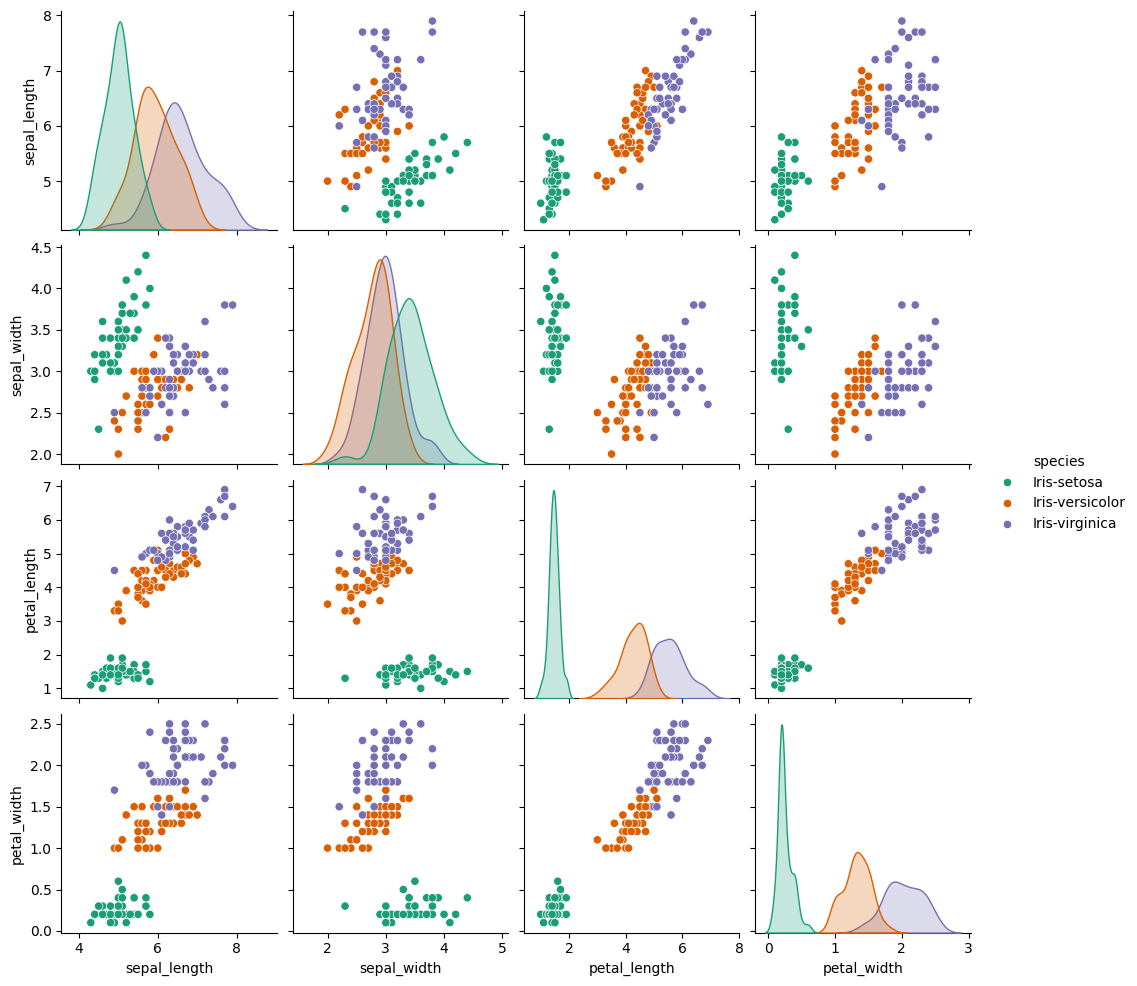

In [25]:
sns.pairplot(df,hue= 'species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

In [26]:
df1 = df.copy()

In [27]:
dfcorr=df.drop(['species'], axis=1).corr()

In [28]:
dfcorr.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.940945,0.975569,0.962857
sepal_width,-0.940945,1.000000,-0.992055,-0.994701
petal_length,0.975569,-0.992055,1.000000,0.997923
petal_width,0.962857,-0.994701,0.997923,1.000000


<Axes: >

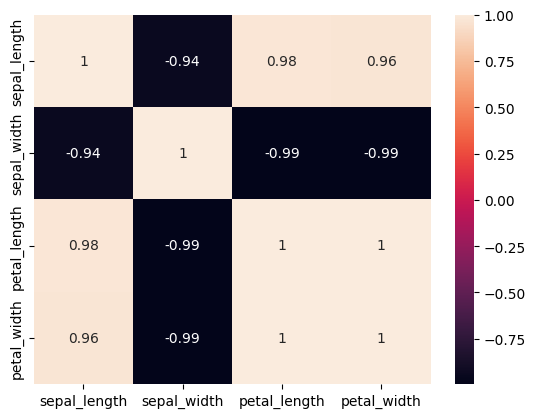

In [29]:
sns.heatmap(dfcorr.corr() , annot =True)

In [30]:
x = df.drop(['species'], axis=1)
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)
method_names = []
method_scores = []

In [31]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 6: {}".format(knn.score(x_test,y_test)))

Score for Number of Neighbors = 6: 0.9555555555555556


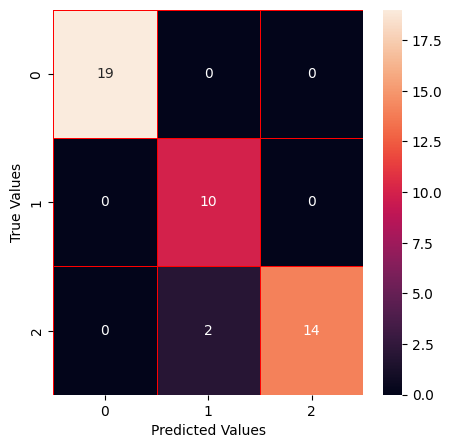

In [32]:
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Text(0, 0.5, 'score')

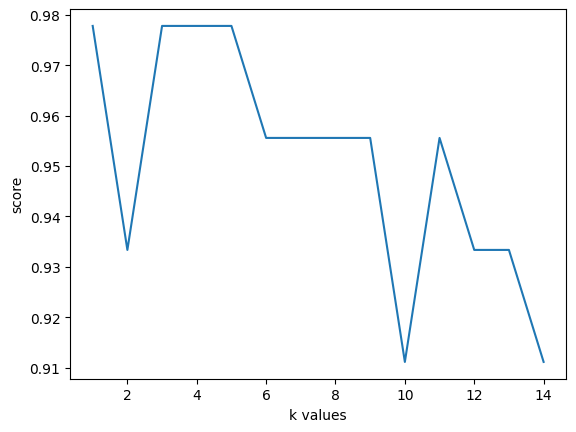

In [33]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 4: 0.9777777777777777


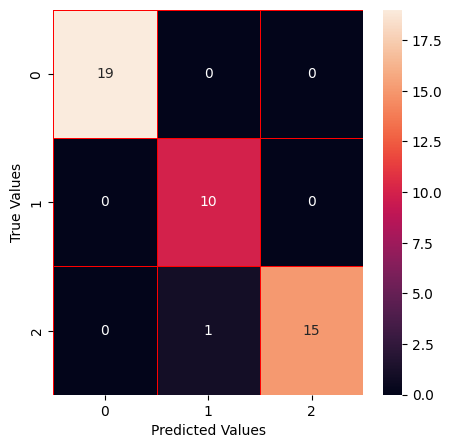

In [34]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 4: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [36]:
svm = SVC(kernel='linear',random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

SVM Classification Score is: 0.9555555555555556


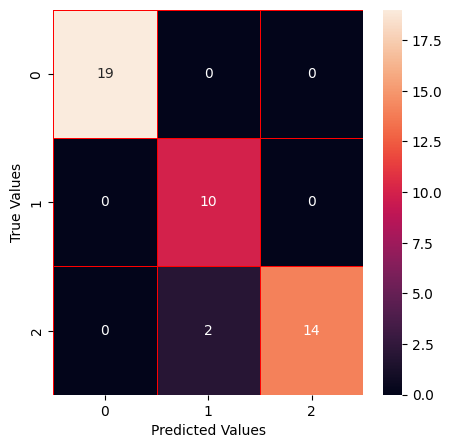

In [37]:
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()